## Unpickle my DFs

In [1]:
import pandas as pd
import re
import pickle
import string

# Display data tools
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Pickle in test reviews:

In [2]:
unpickled_test = pd.read_pickle("./album_reviews_test.pkl")
unpickled_test

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
0,Larry Fitzmaurice,Pitchfork,RL Grime,Nova,Electronic,4.1,Henry Steinway’s second full-length largely ab...
1,Jillian Mapes,Pitchfork,Ariana Grande,Sweetener,Pop/R&B,8.1,"After years of searching, Ariana Grande has fo..."
2,Rob Mitchum,Pitchfork,Red Hot Chili Peppers,Stadium Arcadium,Rock,4.7,2xCD set of arena-friendly songs about Califor...
3,Taylor M. Clark,Pitchfork,Common,Like Water for Chocolate,Rap,8.7,"Man, about five years ago I was so damn white...."


### Pickle in previously modeled df

In [3]:
Pitchfork_tm = pd.read_pickle("./Pitchfork_unpick.pkl")
Pitchfork_tm

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
0,Sheldon Pearce,Pitchfork,BTS,Map of the Soul: 7,Pop/R&B,6.3,the k pop groups latest is part memoir part f...
1,Ruth Saxelby,Pitchfork,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
2,Cat Zhang,Pitchfork,Sunny Jain,Wild Wild East,Experimental,6.8,the composer and jazz multi instrumentalist ex...
3,Andy Beta,Pitchfork,AceMoMA,A New Dawn,Electronic,7.6,rising new york fixtures acemo and moma ready ...
4,Paul A. Thompson,Pitchfork,Boldy James,The Price of Tea in China,Rap,8.0,on their latest collaboration the detroit rap...
...,...,...,...,...,...,...,...
1182,Larry Fitzmaurice,Pitchfork,Diplo,Europa EP,Electronic,4.2,despite trending toward pop in recent years t...
1183,Eric Torres,Pitchfork,IAMDDB,Swervvvvv.5,Rap,7.3,on her supposedly final mixtape before she iss...
1184,Stephen Kearse,Pitchfork,Offset,Father of 4,Rap,6.9,though its undermined by its inertia and lack ...
1185,Olivia Horn,Pitchfork,Julia Jacklin,Crushing,Rock,7.7,on an album that mines failed relationships fo...


In [4]:
# # remove several albums from Pitchfork_tm for testing, as they created their own topics/components
# Pitchfork_tm.iloc[938]

In [5]:
# Pitchfork_tm.iloc[28]

In [6]:
Peter_Gabriel = (Pitchfork_tm.iloc[166]).to_frame().T
Peter_Gabriel

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
166,Eric Harvey,Pitchfork,Peter Gabriel,So,Rock,9.1,each sunday pitchfork takes an in depth look ...


In [7]:
AphexTwin = (Pitchfork_tm.iloc[938]).to_frame().T
AphexTwin

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
938,Philip Sherburne,Pitchfork,Aphex Twin,Selected Ambient Works Volume II,Electronic,10,each sunday pitchfork takes an in depth look ...


In [8]:
KLF = (Pitchfork_tm.iloc[28]).to_frame().T
KLF

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
28,Philip Sherburne,Pitchfork,The KLF,Chill Out,Electronic,8.9,each sunday pitchfork takes an in depth look ...


In [9]:
Dr_dre = (Pitchfork_tm.iloc[194]).to_frame().T
Dr_dre

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
194,Sheldon Pearce,Pitchfork,Dr. Dre,The Chronic,Rap,10,each sunday pitchfork takes an in depth look ...


In [10]:
Fontaines = (Pitchfork_tm.iloc[1004]).to_frame().T
Fontaines

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
1004,Stuart Berman,Pitchfork,Fontaines D.C.,Dogrel,Rock,8.0,the steely dublin post punk band infuse the bi...


### Join  AphexTwin,  KLF, Dr_dre, & Fontaines dataframes

In [11]:
joined_df = AphexTwin.append([KLF, Dr_dre, Fontaines, Peter_Gabriel])
joined_df

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
938,Philip Sherburne,Pitchfork,Aphex Twin,Selected Ambient Works Volume II,Electronic,10,each sunday pitchfork takes an in depth look ...
28,Philip Sherburne,Pitchfork,The KLF,Chill Out,Electronic,8.9,each sunday pitchfork takes an in depth look ...
194,Sheldon Pearce,Pitchfork,Dr. Dre,The Chronic,Rap,10,each sunday pitchfork takes an in depth look ...
1004,Stuart Berman,Pitchfork,Fontaines D.C.,Dogrel,Rock,8.0,the steely dublin post punk band infuse the bi...
166,Eric Harvey,Pitchfork,Peter Gabriel,So,Rock,9.1,each sunday pitchfork takes an in depth look ...


### Join 'joined_df' and 'unpickled_test' on Publication

In [12]:
Test_df = unpickled_test.append(joined_df)
Test_df

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
0,Larry Fitzmaurice,Pitchfork,RL Grime,Nova,Electronic,4.1,Henry Steinway’s second full-length largely ab...
1,Jillian Mapes,Pitchfork,Ariana Grande,Sweetener,Pop/R&B,8.1,"After years of searching, Ariana Grande has fo..."
2,Rob Mitchum,Pitchfork,Red Hot Chili Peppers,Stadium Arcadium,Rock,4.7,2xCD set of arena-friendly songs about Califor...
3,Taylor M. Clark,Pitchfork,Common,Like Water for Chocolate,Rap,8.7,"Man, about five years ago I was so damn white...."
938,Philip Sherburne,Pitchfork,Aphex Twin,Selected Ambient Works Volume II,Electronic,10,each sunday pitchfork takes an in depth look ...
28,Philip Sherburne,Pitchfork,The KLF,Chill Out,Electronic,8.9,each sunday pitchfork takes an in depth look ...
194,Sheldon Pearce,Pitchfork,Dr. Dre,The Chronic,Rap,10,each sunday pitchfork takes an in depth look ...
1004,Stuart Berman,Pitchfork,Fontaines D.C.,Dogrel,Rock,8.0,the steely dublin post punk band infuse the bi...
166,Eric Harvey,Pitchfork,Peter Gabriel,So,Rock,9.1,each sunday pitchfork takes an in depth look ...


## Remove those rows from the Pitchfork_tm

In [13]:
Pitchfork_tm.loc[Pitchfork_tm['Artist'] == 'Fontaines D.C.']

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
1004,Stuart Berman,Pitchfork,Fontaines D.C.,Dogrel,Rock,8.0,the steely dublin post punk band infuse the bi...


In [14]:
Pitchfork_tm.loc[Pitchfork_tm['Artist'] == 'Aphex Twin']

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
938,Philip Sherburne,Pitchfork,Aphex Twin,Selected Ambient Works Volume II,Electronic,10,each sunday pitchfork takes an in depth look ...


In [15]:
Pitchfork_tm.loc[Pitchfork_tm['Artist'] == 'The KLF']

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
28,Philip Sherburne,Pitchfork,The KLF,Chill Out,Electronic,8.9,each sunday pitchfork takes an in depth look ...


In [16]:
Pitchfork_tm.loc[Pitchfork_tm['Artist'] == 'Dr. Dre']

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
194,Sheldon Pearce,Pitchfork,Dr. Dre,The Chronic,Rap,10,each sunday pitchfork takes an in depth look ...


In [17]:
Pitchfork_tm.loc[Pitchfork_tm['Artist'] == 'Peter Gabriel']

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
166,Eric Harvey,Pitchfork,Peter Gabriel,So,Rock,9.1,each sunday pitchfork takes an in depth look ...


In [18]:
Pitchfork_tm_new = Pitchfork_tm.drop(Pitchfork_tm.index[[1004,938,28,194, 166]])

### Import Preprocessing Modules

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams
from nltk.corpus import stopwords

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jcnachman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jcnachman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Preprocessing 
- Remove Characters and Replace Certain words based on topic modeling results in JoannaN_Topic_Modeling1 notebook

In [30]:
# Remove review where no review exists
result = Pitchfork_tm_new[Pitchfork_tm_new.Publication != 'No publication']
result

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
0,Sheldon Pearce,Pitchfork,BTS,Map of the Soul: 7,Pop/R&B,6.3,the k pop groups latest is part memoir part f...
1,Ruth Saxelby,Pitchfork,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
2,Cat Zhang,Pitchfork,Sunny Jain,Wild Wild East,Experimental,6.8,the composer and jazz multi instrumentalist ex...
3,Andy Beta,Pitchfork,AceMoMA,A New Dawn,Electronic,7.6,rising new york fixtures acemo and moma ready ...
4,Paul A. Thompson,Pitchfork,Boldy James,The Price of Tea in China,Rap,8.0,on their latest collaboration the detroit rap...
...,...,...,...,...,...,...,...
1182,Larry Fitzmaurice,Pitchfork,Diplo,Europa EP,Electronic,4.2,despite trending toward pop in recent years t...
1183,Eric Torres,Pitchfork,IAMDDB,Swervvvvv.5,Rap,7.3,on her supposedly final mixtape before she iss...
1184,Stephen Kearse,Pitchfork,Offset,Father of 4,Rap,6.9,though its undermined by its inertia and lack ...
1185,Olivia Horn,Pitchfork,Julia Jacklin,Crushing,Rock,7.7,on an album that mines failed relationships fo...


## Remove duplicates for 'Album_Name'

In [31]:
result = result.drop_duplicates(subset ='Album_Name')
result

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
0,Sheldon Pearce,Pitchfork,BTS,Map of the Soul: 7,Pop/R&B,6.3,the k pop groups latest is part memoir part f...
1,Ruth Saxelby,Pitchfork,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
2,Cat Zhang,Pitchfork,Sunny Jain,Wild Wild East,Experimental,6.8,the composer and jazz multi instrumentalist ex...
3,Andy Beta,Pitchfork,AceMoMA,A New Dawn,Electronic,7.6,rising new york fixtures acemo and moma ready ...
4,Paul A. Thompson,Pitchfork,Boldy James,The Price of Tea in China,Rap,8.0,on their latest collaboration the detroit rap...
...,...,...,...,...,...,...,...
1182,Larry Fitzmaurice,Pitchfork,Diplo,Europa EP,Electronic,4.2,despite trending toward pop in recent years t...
1183,Eric Torres,Pitchfork,IAMDDB,Swervvvvv.5,Rap,7.3,on her supposedly final mixtape before she iss...
1184,Stephen Kearse,Pitchfork,Offset,Father of 4,Rap,6.9,though its undermined by its inertia and lack ...
1185,Olivia Horn,Pitchfork,Julia Jacklin,Crushing,Rock,7.7,on an album that mines failed relationships fo...


## Reset 'result' index

In [32]:
result = result.reset_index()
result

,index,Author,Publication,Artist,Album_Name,Genre,Score,Contents
0,0,Sheldon Pearce,Pitchfork,BTS,Map of the Soul: 7,Pop/R&B,6.3,the k pop groups latest is part memoir part f...
1,1,Ruth Saxelby,Pitchfork,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
2,2,Cat Zhang,Pitchfork,Sunny Jain,Wild Wild East,Experimental,6.8,the composer and jazz multi instrumentalist ex...
3,3,Andy Beta,Pitchfork,AceMoMA,A New Dawn,Electronic,7.6,rising new york fixtures acemo and moma ready ...
4,4,Paul A. Thompson,Pitchfork,Boldy James,The Price of Tea in China,Rap,8.0,on their latest collaboration the detroit rap...
...,...,...,...,...,...,...,...,...
1174,1182,Larry Fitzmaurice,Pitchfork,Diplo,Europa EP,Electronic,4.2,despite trending toward pop in recent years t...
1175,1183,Eric Torres,Pitchfork,IAMDDB,Swervvvvv.5,Rap,7.3,on her supposedly final mixtape before she iss...
1176,1184,Stephen Kearse,Pitchfork,Offset,Father of 4,Rap,6.9,though its undermined by its inertia and lack ...
1177,1185,Olivia Horn,Pitchfork,Julia Jacklin,Crushing,Rock,7.7,on an album that mines failed relationships fo...


In [33]:
# Text preprocessing steps 
# remove numbers, capital letters and punctuation
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x) #remove numbers
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower()) # can i put & back in?
# punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ') # can i put & back in?

# # Replacing words
each_sunday = lambda x: x.replace('each sunday  pitchfork takes an in depth look at a significant album from the past  and any record not in our archives is eligible','')
today_pitch = lambda x: x.replace('today on pitchfork  we are taking a critical look at','')
today_revisit = lambda x: x.replace('today we revisit','')
today_revisit2 = lambda x: x.replace('today  we revisit','')
today_todayon = lambda x: x.replace('today on pitchfork  we are publishing new reviews of five important early stereolab records  each one a rung on the ladder of one of the most exceptional and historically influential bands','')

sub_gogos = lambda x: x.replace('go gos', 'go_go')
sub_gogo = lambda x: x.replace('go go', 'go_go')
sub_dre = lambda x: x.replace('dres', 'dre')
sub_rap = lambda x: x.replace('raps', 'rap')
sub_rapper = lambda x: x.replace('rappers', 'rapper')
sub_hiphop = lambda x: x.replace('hip hop', 'hiphop')
sub_songwriting = lambda x: x.replace('song writing', 'song writing')
sub_rems = lambda x: x.replace('r e m s', 'rem')
sub_rem = lambda x: x.replace('r e m', 'rem')
sub_danfrom = lambda x: x.replace('danfrom', 'dan from')
sub_kdlangs = lambda x: x.replace('k d langs', 'kdlang')
sub_kdlang = lambda x: x.replace('k d lang', 'kdlang')
sub_lofi = lambda x: x.replace('lo fi', 'lofi')
sub_las = lambda x: x.replace('l a s', 'los_angeles')
sub_la = lambda x: x.replace('l a', 'los_angeles')
sub_losang = lambda x: x.replace('los angeles', 'los_angeles')
sub_dc = lambda x: x.replace('washington d c', 'washington_dc')
sub_gogos = lambda x: x.replace('leader s', 'leaders')
sub_rb = lambda x: re.sub('r b','r&b', x)
sub_rbs = lambda x: re.sub('r bs','r&b', x)
sub_kpop = lambda x: x.replace('k pop','kpop')
sub_tswift = lambda x: x.replace('swiftfrom','swift from')
new_york = lambda x: x.replace('new york', 'new_york')
max_b = lambda x: x.replace('max b', 'max_b')
jim_jones = lambda x: x.replace('jim jones', 'jim_jones')
nwa = lambda x: x.replace('n w a', 'nwa')
u_s_a = lambda x: x.replace('the united states', 'the_united_states')
u_k = lambda x: x.replace('u k', 'uk')
up_and_comers = lambda x: x.replace('up and comers', 'up_and_comers')
in_depth = lambda x: x.replace('in depth', 'in-depth')
sub_band = lambda x: x.replace('bands', 'band')
sub_album = lambda x: x.replace('albums', 'album')
sub_song = lambda x: x.replace('songs', 'song')
rom_com = lambda x: x.replace('rom com', 'rom-com')
long_shot = lambda x: x.replace('long shot', 'long-shot')
in_memory_of = lambda x: x.replace('in memory of', 'in-memory-of')
dmsr = lambda x: x.replace('d m s r','dmsr')
machinehey = lambda x: x.replace('machinehey','machine hey')
notoriousb = lambda x: x.replace('notorious b i g','notorious big')
notoriousbig = lambda x: x.replace('notorious b i g s','notorious big')
krit = lambda x: x.replace('k r i t','krit')
mafia = lambda x: x.replace('m a f i a','mafia')

In [34]:
# Dealing with 'Contents' column
result['Contents'] = result.Contents.map(alphanumeric).map(punc_lower).map(each_sunday).map(sub_gogo).map(sub_gogos).map(sub_dre).map(sub_rap).map(sub_rapper).map(sub_hiphop).map(sub_songwriting).map(today_pitch).map(today_revisit).map(today_revisit2).map(today_todayon).map(sub_rems).map(sub_rem).map(sub_danfrom).map(sub_kdlangs).map(sub_kdlang).map(sub_lofi).map(sub_las).map(sub_la).map(sub_dc).map(sub_gogos).map(sub_rb).map(sub_rbs).map(sub_kpop).map(sub_tswift).map(new_york).map(max_b).map(jim_jones).map(nwa).map(u_s_a).map(u_k).map(up_and_comers).map(in_depth).map(sub_band).map(sub_album).map(sub_song).map(rom_com).map(long_shot).map(in_memory_of).map(dmsr).map(machinehey).map(notoriousb).map(notoriousbig).map(krit).map(mafia).map(sub_losang)


### Drop Publication column

In [35]:
result = result.drop(columns = 'Publication')

In [36]:
result.head()

,index,Author,Artist,Album_Name,Genre,Score,Contents
0,0,Sheldon Pearce,BTS,Map of the Soul: 7,Pop/R&B,6.3,the kpop groups latest is part memoir part fa...
1,1,Ruth Saxelby,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
2,2,Cat Zhang,Sunny Jain,Wild Wild East,Experimental,6.8,the composer and jazz multi instrumentalist ex...
3,3,Andy Beta,AceMoMA,A New Dawn,Electronic,7.6,rising new_york fixtures acemo and moma ready ...
4,4,Paul A. Thompson,Boldy James,The Price of Tea in China,Rap,8.0,on their latest collaboration the detroit rap...


### Drop 'index' column

In [37]:
result = result.drop(columns = 'index')
result

,Author,Artist,Album_Name,Genre,Score,Contents
0,Sheldon Pearce,BTS,Map of the Soul: 7,Pop/R&B,6.3,the kpop groups latest is part memoir part fa...
1,Ruth Saxelby,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
2,Cat Zhang,Sunny Jain,Wild Wild East,Experimental,6.8,the composer and jazz multi instrumentalist ex...
3,Andy Beta,AceMoMA,A New Dawn,Electronic,7.6,rising new_york fixtures acemo and moma ready ...
4,Paul A. Thompson,Boldy James,The Price of Tea in China,Rap,8.0,on their latest collaboration the detroit rap...
...,...,...,...,...,...,...
1174,Larry Fitzmaurice,Diplo,Europa EP,Electronic,4.2,despite trending toward pop in recent years t...
1175,Eric Torres,IAMDDB,Swervvvvv.5,Rap,7.3,on her supposedly final mixtape before she iss...
1176,Stephen Kearse,Offset,Father of 4,Rap,6.9,though its undermined by its inertia and lack ...
1177,Olivia Horn,Julia Jacklin,Crushing,Rock,7.7,on an album that mines failed relationships fo...


### result df -> pickle

In [304]:
result.to_pickle("./result.pkl")

### Stopwords

In [38]:
# list out all my stopwords 
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [39]:
# adding words to list:

stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['like','didnt','wasnt','music','theyve']
stopwords.extend(newStopWords)

In [40]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Topic Modeling with gensim
- From here [Topic Modeling](http://localhost:8888/notebooks/curriculum/project-04/topic-modeling/JoannaN_LDA_Exercise.ipynb)

In [42]:
# gensim
from gensim import corpora, models, similarities, matutils

# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [43]:
# Create a CountVectorizer for parsing/counting words
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words=stopwords, token_pattern="\\b[a-z][a-z]+\\b")

count_vectorizer.fit(result.Contents)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
                tokenizer=None, vocabulary=None)

In [44]:
# Create the term-document matrix
# Transpose it so the terms are the rows
doc_word = count_vectorizer.transform(result.Contents).transpose()

In [45]:
pd.DataFrame(doc_word.toarray(), count_vectorizer.get_feature_names()).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178
aaa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaa powerline,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [46]:
doc_word.shape

(478842, 1179)

### Convert to gensim

In [47]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_word)

##### Map matrix rows to words (tokens)


In [48]:
# Save a mapping (dict) of row id to word (token) for later use by gensim

In [49]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [50]:
len(id2word)

478842

## Non-Negative Matrix Factorization (NMF)

● NMF models are interpretable (unlike PCA)

● Easy to interpret means easy to explain! 

[NMF AWS](https://s3.amazonaws.com/assets.datacamp.com/production/course_3161/slides/ch4_slides.pdf)

In this example, we are going to start with documents that contain many unique words (or features). The goal is to reduce those words down into 2 topics, so that each document can be represented as some combination of the 2 topics. We will be using NMF this time around.

In [51]:
from sklearn.decomposition import NMF
import numpy as np
import random

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

import pprint

In [52]:
ex_label = [e[:30]+"..." for e in result.Contents]
ex_label

['the kpop groups latest is part...',
 'the danish dj courtesys label ...',
 'the composer and jazz multi in...',
 'rising new_york fixtures acemo...',
 'on their latest collaboration ...',
 'the latest in springsteens vin...',
 'on his solo album  the london ...',
 'marco del rios song are full o...',
 '   type o negatives third albu...',
 'the band new lp is a rosily op...',
 'the hardcore quartets   minute...',
 'on their second album  the met...',
 'grimes first project as a bona...',
 'the uk singer songwriters   al...',
 'the afghan whigs leaders debut...',
 'assisted by the falls late mar...',
 'the lanky london outlaw with c...',
 'the duo continue their drift f...',
 'two archival releases highligh...',
 'maya bons diaristic bedroom ro...',
 'with its mix of rustic lullabi...',
 'after a mixtape staking his cl...',
 'using a fanciful palette of ch...',
 'the veteran djs first solo ep ...',
 'the pop star returns with a gr...',
 'the new_york city based concep...',
 'the instru

### Shuffle through min_df and max_df to find the optimum balance and plot the graph


In [55]:
vectorizer_list = []

In [56]:
for min_d in range(1,20,2):
    for max_d in range(9,20,2):
        max_d = max_d/100
        vectorizer = CountVectorizer(stop_words=stopwords,binary=True,min_df=min_d,max_df=max_d)
        doc_word = vectorizer.fit_transform(result.Contents)
        vectorizer_list.append([vectorizer.min_df, vectorizer.max_df, doc_word.shape[1]])

Columns:

vectorizer.min_df, vectorizer.max_df, doc_word(words)

In [57]:
vectorizer_list

[[1, 0.09, 48502],
 [1, 0.11, 48639],
 [1, 0.13, 48724],
 [1, 0.15, 48800],
 [1, 0.17, 48853],
 [1, 0.19, 48896],
 [3, 0.09, 17706],
 [3, 0.11, 17843],
 [3, 0.13, 17928],
 [3, 0.15, 18004],
 [3, 0.17, 18057],
 [3, 0.19, 18100],
 [5, 0.09, 12067],
 [5, 0.11, 12204],
 [5, 0.13, 12289],
 [5, 0.15, 12365],
 [5, 0.17, 12418],
 [5, 0.19, 12461],
 [7, 0.09, 9244],
 [7, 0.11, 9381],
 [7, 0.13, 9466],
 [7, 0.15, 9542],
 [7, 0.17, 9595],
 [7, 0.19, 9638],
 [9, 0.09, 7478],
 [9, 0.11, 7615],
 [9, 0.13, 7700],
 [9, 0.15, 7776],
 [9, 0.17, 7829],
 [9, 0.19, 7872],
 [11, 0.09, 6209],
 [11, 0.11, 6346],
 [11, 0.13, 6431],
 [11, 0.15, 6507],
 [11, 0.17, 6560],
 [11, 0.19, 6603],
 [13, 0.09, 5315],
 [13, 0.11, 5452],
 [13, 0.13, 5537],
 [13, 0.15, 5613],
 [13, 0.17, 5666],
 [13, 0.19, 5709],
 [15, 0.09, 4632],
 [15, 0.11, 4769],
 [15, 0.13, 4854],
 [15, 0.15, 4930],
 [15, 0.17, 4983],
 [15, 0.19, 5026],
 [17, 0.09, 4057],
 [17, 0.11, 4194],
 [17, 0.13, 4279],
 [17, 0.15, 4355],
 [17, 0.17, 4408],
 [17,

## Plot this drop off

In [58]:
import matplotlib.pyplot as plt
import numpy as np

In [59]:
test_file = np.array(vectorizer_list)

In [60]:
from matplotlib.pyplot import figure

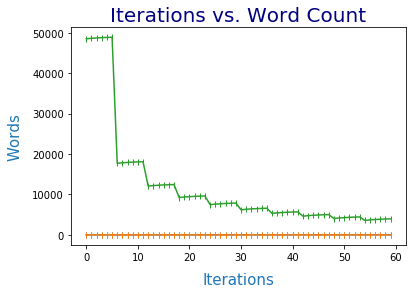

<Figure size 1600x1200 with 0 Axes>

In [61]:
plt.plot(test_file, marker='|')
plt.title('Iterations vs. Word Count', color='navy', fontsize=20)
plt.xlabel('Iterations', color='tab:blue', labelpad=10, fontsize=15)
plt.ylabel('Words', color='tab:blue', labelpad=10, fontsize=15)
figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k');
plt.show();

In [62]:
# I want ~10K words, so I'll go with this one:  [7, 0.19, 9638]

In [63]:
## Run NMF with parameters from vectorizer_list: [7, 0.19, 9638]
vectorizer = CountVectorizer(stop_words=stopwords,binary=True, min_df=7, max_df=.19) 
doc_word = vectorizer.fit_transform(result.Contents)

In [64]:
vectorizer

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.19, max_features=None, min_df=7,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [65]:
pd.DataFrame(doc_word.toarray(), index=ex_label, columns=vectorizer.get_feature_names()).shape

(1179, 9638)

In [66]:
pd.DataFrame(doc_word.toarray(), index=ex_label, columns=vectorizer.get_feature_names()).sum().sort_values(ascending=True).describe()

count    9638.00000
mean       27.52791
std        32.57091
min         7.00000
25%         9.00000
50%        15.00000
75%        30.00000
max       224.00000
dtype: float64

Customized run : vectorizer = CountVectorizer(stop_words=stopwords,binary=True, min_df=5, max_df=.19):
    
There are 9652 words.

**Average** word shows up in *~28 docs*.

**Median (50%)** word shows up in *15 docs*.

### 8 topics/components

In [68]:
nmf_model = NMF(8)
doc_topic = nmf_model.fit_transform(doc_word)

In [70]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8"],
             columns = vectorizer.get_feature_names())
topic_word

,aaron,abandon,abandoned,abandoning,abandons,abiding,abilities,ability,able,abound,abrasive,abrupt,abruptly,absence,absent,absolute,absolutely,absorb,absorbed,absorbing,abstract,abstraction,absurd,absurdist,absurdity,abundance,abuse,abused,abusive,abyss,ac,academic,academy,accelerating,accent,accents,accentuates,accept,acceptance,accepted,accepting,access,accessibility,accessible,accident,accidental,accidentally,acclaim,acclaimed,accommodate,accompanied,accompanies,accompaniment,accompany,accompanying,accomplished,accordance,according,accordingly,accordion,account,accounts,accumulated,accurate,accurately,accused,ache,achieve,achieved,achievement,achieves,achieving,aching,acid,acknowledge,acknowledged,acknowledges,acknowledging,acknowledgment,acoustic,acquired,act,acting,action,actions,active,actively,activism,activist,activity,actor,actors,actress,acts,actual,actually,acute,ad,adam,adams,adapted,add,added,addiction,adding,addition,additional,addres,addresed,addreses,addresing,adds,adept,adjacent,administration,admirable,admirably,admiration,admire,admiring,admission,admit,admits,admitted,admitting,adolescence,adolescent,adopted,adopting,adopts,adoration,adored,adrenaline,adrian,adrift,adult,adulthood,adults,advance,advanced,advantage,adventure,adventures,adventurous,adventurousness,advertising,advice,advocate,aesthetic,aesthetically,aesthetics,affair,affairs,affect,affecting,affection,affinity,affirmation,affirmations,affirming,afford,afloat,aforementioned,afraid,africa,african,africas,afro,afrobeat,afropop,afterlife,aftermath,afternoon,age,aged,agency,agenda,agent,ages,aggression,aggressive,aggressively,aggro,agile,aging,agnostic,ago,agony,agree,agreed,ah,ahead,ai,aid,aided,aids,aim,aimed,aiming,aimless,aims,aint,air,airport,airy,aka,akin,al,alabama,alanis,alarm,albeit,albini,albumthe,alchemist,alchemy,alex,alexandra,algorithm,algorithms,ali,alias,aliases,alice,alien,alienated,alienation,aliens,aligns,alike,alive,allegedly,allegiance,allegory,allen,allos_angelesbout,allos_angeleslong,allos_angelest,allow,allowed,allowing,allows,alludes,allure,alluring,allusions,almighty,alone,along,alongside,...,weekend,weekly,weeknd,weeks,weeping,weepy,weighed,weight,weightless,weighty,weird,weirder,weirdly,weirdness,weirdo,weirdos,welcome,welcoming,wellos_angeless,went,werent,west,western,wests,wet,weve,whatever,whats,wheel,wheels,wheezy,whenever,whereas,wherein,wherever,whether,whiff,whimsical,whimsy,whip,whiplash,whipped,whipping,whips,whirlwind,whiskey,whisper,whispered,whispering,whispers,whispery,whistle,whistles,white,whites,whitney,whod,whole,wholesome,wholly,whos,whove,wide,widely,wider,widescreen,widespread,wielding,wields,wife,wild,wildly,willfully,william,williams,willie,willing,willingness,willos_angeleslways,wilson,wilsons,win,wind,winding,window,windows,winds,wine,wing,wings,wink,winking,winner,winning,wins,winsome,winter,wire,wires,wiry,wisdom,wise,wisely,wiser,wish,wishes,wishing,wispy,wistful,wit,witch,within,witness,witty,wizard,wobble,wobbly,woke,wolf,woman,womans,women,womens,wonder,wondered,wonderful,wonderfully,wondering,wonders,wondrous,wont,woo,wood,wooden,woods,woodstock,woodwind,woodwinds,woozy,wop,word,wordless,wordplay,wore,worked,worker,workers,working,workout,workouts,works,worlds,worldview,worldwide,worn,worried,worries,worry,worse,worship,worshipping,worst,worth,worthwhile,worthy,wouldnt,wouldve,wound,wounded,wounds,woven,wow,wrap,wrapped,wrapping,wreckage,wrenching,wrestles,wrestling,wrings,wrist,write,writer,writers,writes,writing,written,wrld,wrong,wrote,wrought,wry,wu,xcx,xs,xx,xxxtentacion,ya,yacht,yall,yang,yard,yeah,yeahs,yearn,yearning,yearns,yeezus,yell,yelling,yellow,yells,yelp,yelps,yes,yesterday,yield,yielded,yielding,yields,yin,yip,yo,yoga,yore,youd,youknow,youll,younger,youngest,youngs,yous,youth,youthful,youths,youtube,youve,yung,zane,zealand,zeitgeist,zen,zeppelin,zero,zeroes,zine,zombie,zone,zoo,zs
component_1,0.022,0.115,0.123,0.020,0.000,0.016,0.004,0.053,0.120,0.010,0.000,0.010,0.026,0.053

In [71]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [72]:
display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic


Topic  0
became, told, came, recording, took, version, seemed, wrote, five, began, played, known, playing, night, going

Topic  1
electronic, synths, dance, techno, club, producers, ambient, beats, dancefloor, dj, ep, rhythms, mix, rave, cut

Topic  2
rapper, beats, lil, rapping, hiphop, shit, produced, star, flow, verses, baby, features, verse, guest, trying

Topic  3
songwriter, someone, writing, shes, emotional, songwriting, feeling, singing, folk, alone, acoustic, room, relationship, closer, feelings

Topic  4
jazz, piece, notes, composer, pieces, musicians, based, within, form, compositions, ambient, melody, familiar, group, recordings

Topic  5
woman, girl, women, shes, culture, video, wrote, sex, stars, girls, told, written, today, singles, used

Topic  6
radio, group, help, singing, singles, version, american, collection, sing, approach, emotional, major, great, hits, ground

Topic  7
guitarist, drummer, indie, guitars, fans, noise, group, bassist, metal, lead, members, groups

### What are these topics about?

The H matrix shows us the documents we started with, and how each document is made up of the resulting topics. In this case:

Topic  0
 recording/version, wrote, played/playing, night

Topic  1
electronic/rave/dance/techno/club music, producers, beats, dj

Topic  2
rap and hiphop, beats, produced, star, flow, verse(s), guest

Topic  3
songwriting, emotions and feelings, folk/acoustic music


Topic  4
jazz pieces, composers and compositions, musicians, ambient, melody, group, recordings

Topic  5
women and girls, culture, video, sex, stars/singles, girls

Topic  6
radio, group, help, sing/singing, singles/hits, version, american, collection, emotional, major/great

Topic  7
group(s) - guitars/guitarist, drummer, bassist, lead, members, indie, hardcore/metal, fans, noise, 

In [73]:
H = pd.DataFrame(doc_topic.round(3),
             index = ex_label,
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8"])
H = H.reset_index() # This looks better
H

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
0,the kpop groups latest is part...,0.000,0.120,0.540,0.000,0.116,0.348,0.006,0.161
1,the danish dj courtesys label ...,0.022,0.564,0.000,0.132,0.038,0.000,0.006,0.000
2,the composer and jazz multi in...,0.000,0.000,0.164,0.000,0.581,0.171,0.024,0.000
3,rising new_york fixtures acemo...,0.008,0.658,0.123,0.000,0.000,0.000,0.014,0.000
4,on their latest collaboration ...,0.012,0.163,0.494,0.051,0.183,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
1174,despite trending toward pop in...,0.000,0.211,0.372,0.000,0.073,0.000,0.119,0.019
1175,on her supposedly final mixtap...,0.000,0.141,0.373,0.037,0.075,0.012,0.019,0.009
1176,though its undermined by its i...,0.000,0.003,0.506,0.246,0.028,0.103,0.013,0.000
1177,on an album that mines failed ...,0.068,0.028,0.006,0.802,0.000,0.000,0.072,0.000


### Masks for specific key where component_1 > Other Components

In [74]:
mask1 = ((H['component_1'] > H['component_2']) & (H['component_1'] > H['component_3']) & (H['component_1'] > H['component_4']) & (H['component_1'] > H['component_5']) & (H['component_1'] > H['component_6']) & (H['component_1'] > H['component_7']) & (H['component_1'] > H['component_8']))
H[mask1]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
5,the latest in springsteens vin...,0.736,0.000,0.023,0.162,0.246,0.000,0.173,0.000
50,buffy sainte maries cosmic ...,0.806,0.013,0.000,0.405,0.479,0.440,0.000,0.000
97,a pure and quiet record fro...,1.054,0.000,0.000,0.615,0.000,0.296,0.053,0.045
122,on the first posthumous album ...,0.350,0.000,0.000,0.286,0.177,0.000,0.000,0.000
175,cleaned up and newly remastere...,0.236,0.093,0.000,0.000,0.233,0.000,0.019,0.224
180,carole kings tapestry the ...,1.130,0.000,0.000,0.740,0.000,0.053,0.000,0.000
213,a new reissue of the illusory ...,0.235,0.115,0.039,0.180,0.222,0.000,0.000,0.000
234,this five disc set which incl...,0.346,0.121,0.057,0.000,0.008,0.020,0.053,0.118
238,the rolling stones album ...,1.434,0.577,0.000,0.000,0.000,0.000,0.000,0.000
265,steely dan from their early c...,0.810,0.000,0.187,0.258,0.000,0.055,0.000,0.010


In [75]:
# H[mask1].count()

In [76]:
# result.index[H[mask1].index]

In [77]:
# # Print the articles for those reviews
# index_pos1 = result.index[H[mask1].index]

#### Do these component_1 albums appear to be similar?

In [78]:
# result.loc[index_pos1].head()

In [79]:
# Pitchfork_component1 = result.loc[index_pos1]
# Pitchfork_component1.head()

In [80]:
# # Are the genres mostly consistent? Yea, the majority are rock. 
# Pitchfork_component1.Genre.value_counts()

**Remember, Component 1 = Topic 0:**

Top Genre: Rock

This seems to match nicely. 

In [81]:
# display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic

In [82]:
# Pitchfork_component1.dtypes

In [83]:
# Pitchfork_component1['Score'] = Pitchfork_component1['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [84]:
# # Are the scores mostly consistent? Yes, mean & median(50%) are very close
# Pitchfork_component1.Score.describe()

In [85]:
# # Are the authors mostly consistent? 
# Pitchfork_component1.Author.describe()

### Masks for specific key where component_2 > Other Components

In [86]:
mask2 = ((H['component_2'] > H['component_1']) & (H['component_2'] > H['component_3']) & (H['component_2'] > H['component_4']) & (H['component_2'] > H['component_5']) & (H['component_2'] > H['component_6']) & (H['component_2'] > H['component_7']) & (H['component_2'] > H['component_8']))
H[mask2]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
1,the danish dj courtesys label ...,0.022,0.564,0.000,0.132,0.038,0.000,0.006,0.000
3,rising new_york fixtures acemo...,0.008,0.658,0.123,0.000,0.000,0.000,0.014,0.000
6,on his solo album the london ...,0.000,0.315,0.008,0.293,0.000,0.086,0.000,0.038
22,using a fanciful palette of ch...,0.000,0.365,0.000,0.214,0.081,0.039,0.008,0.040
23,the veteran djs first solo ep ...,0.000,0.679,0.000,0.183,0.049,0.058,0.000,0.000
25,the new_york city based concep...,0.000,0.326,0.114,0.162,0.199,0.041,0.000,0.000
30,on his fourth album kevin par...,0.143,0.478,0.123,0.329,0.067,0.000,0.000,0.175
38,the debut from the london musi...,0.000,0.926,0.000,0.000,0.416,0.033,0.000,0.000
41,on his debut solo album under ...,0.000,0.241,0.087,0.055,0.076,0.050,0.000,0.181
42,nicolas jaar returns to his da...,0.000,0.369,0.101,0.000,0.000,0.021,0.000,0.140


In [87]:
# H[mask2].count()

In [88]:
# result.index[H[mask2].index]

In [89]:
# index_pos2 = result.index[H[mask2].index]

In [90]:
# # Print the articles for those reviews
# result.iloc[index_pos2].head()

In [91]:
# Pitchfork_component2 = result.iloc[index_pos2]
# Pitchfork_component2.head()

In [92]:
# # Are the genres mostly consistent? Yea, the majority are electronic. Then experimental then rock. 
# Pitchfork_component2.Genre.value_counts()

**Remember, Component 2 = Topic  1:**

Top Genre: electronic.

This seems to match up too.

In [93]:
# display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic

In [94]:
# Pitchfork_component2.dtypes

In [95]:
# Pitchfork_component2['Score'] = Pitchfork_component2['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [96]:
# # Are the scores mostly consistent? Yes, mean & median(50%) are very close
# Pitchfork_component2.Score.describe()

In [97]:
# # Are the authors mostly consistent? 
# Pitchfork_component2.Author.describe()

### Masks for specific key where component_3 > Other Components

In [98]:
mask3 = ((H['component_3'] > H['component_1']) & (H['component_3'] > H['component_2']) & (H['component_3'] > H['component_4']) & (H['component_3'] > H['component_5']) & (H['component_3'] > H['component_6']) & (H['component_3'] > H['component_7']) & (H['component_3'] > H['component_8']))
H[mask3]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
0,the kpop groups latest is part...,0.000,0.120,0.540,0.000,0.116,0.348,0.006,0.161
4,on their latest collaboration ...,0.012,0.163,0.494,0.051,0.183,0.000,0.000,0.000
21,after a mixtape staking his cl...,0.000,0.104,0.653,0.000,0.031,0.030,0.044,0.000
34,on his collaboration with kenn...,0.000,0.117,0.652,0.000,0.000,0.025,0.039,0.000
35,the rising brooklyn rapper new...,0.011,0.111,0.429,0.082,0.114,0.000,0.000,0.012
39,the enigmatic rapper debut lp ...,0.088,0.016,0.314,0.297,0.089,0.000,0.000,0.000
47,the memphis rapper offers hard...,0.013,0.000,0.439,0.064,0.000,0.000,0.077,0.034
48,the earl sweatshirt collaborat...,0.010,0.070,0.391,0.117,0.190,0.000,0.000,0.000
55,working with lil peep collabor...,0.000,0.097,0.695,0.028,0.000,0.018,0.000,0.044
65,with his big legacy album tha ...,0.000,0.033,0.530,0.218,0.000,0.000,0.004,0.177


In [99]:
# H[mask3].count()

In [100]:
# result.index[H[mask3].index]

In [101]:
# index_pos3 = result.index[H[mask3].index]

In [102]:
# # Print the articles for those reviews
# Pitchfork_component3 = result.iloc[index_pos3]
# Pitchfork_component3.head()

In [103]:
# # Are the genres mostly consistent? Yes, rap is by far the most frequent genre for this topic.
# Pitchfork_component3.Genre.value_counts()

#### Topic 2:



In [104]:
# display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic

In [105]:
# Pitchfork_component3.dtypes

In [106]:
# Pitchfork_component3['Score'] = Pitchfork_component3['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [107]:
# # Are the scores mostly consistent? Yea, mean and median (50%) are pretty close
# Pitchfork_component3.Score.describe()

In [108]:
# # Are the authors mostly consistent? 
# Pitchfork_component3.Author.describe()

### Masks for specific key where component_4 > Other Components

In [109]:
mask4 = ((H['component_4'] > H['component_1']) & (H['component_4'] > H['component_2']) & (H['component_4'] > H['component_3']) & (H['component_4'] > H['component_5']) & (H['component_4'] > H['component_6']) & (H['component_4'] > H['component_7']) & (H['component_4'] > H['component_8']))
H[mask4]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
9,the band new lp is a rosily op...,0.019,0.142,0.012,0.507,0.000,0.194,0.113,0.171
16,the lanky london outlaw with c...,0.051,0.068,0.000,0.357,0.122,0.136,0.000,0.074
19,maya bons diaristic bedroom ro...,0.000,0.057,0.016,0.311,0.020,0.084,0.000,0.000
24,the pop star returns with a gr...,0.044,0.006,0.263,0.465,0.000,0.258,0.043,0.000
27,the oklahoma roots songwriter ...,0.032,0.023,0.013,0.530,0.053,0.112,0.055,0.000
29,setting aside the retro r&b va...,0.123,0.044,0.037,0.305,0.010,0.026,0.015,0.045
32,on their fourth solo release i...,0.000,0.079,0.000,0.313,0.156,0.153,0.000,0.287
33,on her second album the los_a...,0.020,0.229,0.116,0.363,0.163,0.029,0.033,0.010
36,chicagos lili trifilio writes ...,0.000,0.023,0.078,0.287,0.000,0.172,0.046,0.084
37,originally recorded a decade a...,0.000,0.062,0.000,0.268,0.240,0.000,0.000,0.000


In [110]:
# H[mask4].count()

In [111]:
# result.index[H[mask4].index]

In [112]:
# index_pos4 = result.index[H[mask4].index]

In [113]:
# # Print the articles for those reviews
# Pitchfork_component4 = result.iloc[index_pos4]
# Pitchfork_component4

In [114]:
# # Are the genres mostly consistent? Yes, rock is by far the highest, then pop/r&b.
# Pitchfork_component4.Genre.value_counts()

**Remember, Component 4 = Topic  3:**

Top Genre: Rock

In [115]:
# display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic

In [116]:
# Pitchfork_component4.dtypes

In [117]:
# Pitchfork_component4['Score'] = Pitchfork_component4['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [118]:
# # Are the scores mostly consistent? Yea, mean and median (50%) are pretty close
# Pitchfork_component4.Score.describe()

In [119]:
# # Are the authors mostly consistent? 
# Pitchfork_component4.Author.describe()

### Masks for specific key where component_5 > Other Components

In [120]:
mask5 = ((H['component_5'] > H['component_1']) & (H['component_5'] > H['component_2']) & (H['component_5'] > H['component_3']) & (H['component_5'] > H['component_4']) & (H['component_5'] > H['component_6']) & (H['component_5'] > H['component_7']) & (H['component_5'] > H['component_8']))
H[mask5]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
2,the composer and jazz multi in...,0.000,0.000,0.164,0.000,0.581,0.171,0.024,0.000
15,assisted by the falls late mar...,0.127,0.118,0.034,0.089,0.172,0.025,0.023,0.057
18,two archival releases highligh...,0.358,0.000,0.000,0.000,0.778,0.000,0.030,0.000
26,the instrumental duo go all in...,0.116,0.018,0.028,0.113,0.277,0.000,0.031,0.026
31,a new classical sextet known f...,0.012,0.053,0.069,0.018,0.476,0.000,0.041,0.006
46,in pauline oliveros coined ...,0.000,0.000,0.000,0.000,0.848,0.104,0.018,0.000
51,after touring together the ps...,0.001,0.051,0.110,0.000,0.180,0.047,0.109,0.105
63,with unexpected musical contra...,0.000,0.000,0.032,0.283,0.378,0.000,0.000,0.000
70,on the baltimore musicians fir...,0.000,0.076,0.000,0.174,0.358,0.000,0.010,0.034
72,on her latest release the can...,0.000,0.166,0.000,0.225,0.256,0.000,0.000,0.000


In [121]:
# result.index[H[mask5].index]

In [122]:
# index_pos5 = result.index[H[mask5].index]

In [123]:
# # Print the articles for those reviews
# Pitchfork_component5 = result.loc[index_pos5]
# Pitchfork_component5

In [124]:
# # Are the genres mostly consistent? Yes, mostly rock, then jazz and folk/country.
# Pitchfork_component5.Genre.value_counts()

**Remember, Component 5 = Topic  4:**

recording, version, original, musicians, history, john, known, american, white, form, story, playing, country, recordings, notes


In [125]:
# display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic

In [126]:
# Pitchfork_component5['Score'] = Pitchfork_component5['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [127]:
# # Are the scores mostly consistent? Yea, mean and median (50%) are pretty close
# Pitchfork_component5['Score'].describe()

In [128]:
# # Are the authors mostly consistent? 
# Pitchfork_component5.Author.describe()

### Masks for specific key where component_6 > Other Components

In [129]:
mask6 = ((H['component_6'] > H['component_1']) & (H['component_6'] > H['component_2']) & (H['component_6'] > H['component_3']) & (H['component_6'] > H['component_4']) & (H['component_6'] > H['component_5']) & (H['component_6'] > H['component_7']) & (H['component_6'] > H['component_8']))
H[mask6]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
8,type o negatives third albu...,0.643,0.000,0.000,0.012,0.000,0.793,0.000,0.594
12,grimes first project as a bona...,0.000,0.011,0.203,0.232,0.101,0.571,0.000,0.181
13,the uk singer songwriters al...,0.391,0.162,0.000,0.315,0.000,0.421,0.113,0.000
52,with cover song and a couple o...,0.178,0.000,0.000,0.000,0.117,0.216,0.060,0.043
58,the pop star attempts to be al...,0.000,0.088,0.162,0.173,0.000,0.281,0.090,0.000
73,shakiras big crossover reco...,0.000,0.000,0.000,0.000,0.060,2.279,0.013,0.000
105,written from her own perspecti...,0.000,0.080,0.101,0.295,0.000,0.409,0.115,0.003
129,the cryptic youtubers new albu...,0.000,0.176,0.000,0.039,0.147,0.229,0.019,0.139
141,blink third album a defi...,0.433,0.000,0.000,0.000,0.000,1.101,0.000,0.784
145,the second album written prod...,0.064,0.264,0.157,0.000,0.000,0.323,0.062,0.000


In [130]:
# result.index[H[mask6].index]

In [131]:
# index_pos6 = result.index[H[mask6].index]

In [132]:
# # Print the articles for those reviews
# Pitchfork_component6 = result.loc[index_pos6]
# Pitchfork_component6

In [133]:
# # Are the genres mostly consistent? 2 rock and 1 rap.
# Pitchfork_component6.Genre.value_counts()

**Remember, Component 6 = Topic  5:**



In [134]:
# display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic

In [135]:
# Pitchfork_component6.dtypes

In [136]:
# Pitchfork_component6['Score'] = Pitchfork_component6['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [137]:
# # Are the scores mostly consistent? Yea, mean and median (50%) are very close
# Pitchfork_component6['Score'].describe()

In [138]:
# # Are the authors mostly consistent? 
# Pitchfork_component6.Author.describe()

### Masks for specific key where component_7 > Other Components

In [139]:
mask7 = ((H['component_7'] > H['component_1']) & (H['component_7'] > H['component_2']) & (H['component_7'] > H['component_3']) & (H['component_7'] > H['component_4']) & (H['component_7'] > H['component_5']) & (H['component_7'] > H['component_6']) & (H['component_7'] > H['component_8']))
H[mask7]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
366,with harmonized guitars sprin...,0.117,0.094,0.172,0.0,0.0,0.156,0.243,0.178
444,an essential greatest hits ...,0.000,0.000,0.000,0.0,0.0,0.000,5.507,0.000


**Just 2 albums in this topic/component**

In [140]:
# result.index[H[mask7].index]

In [141]:
# index_pos7 = result.index[H[mask7].index]

In [142]:
# # Print the articles for those reviews
# Pitchfork_component7 = result.loc[index_pos7]
# Pitchfork_component7

In [143]:
# # Are the genres mostly consistent? 1 rock and 1 pop/r&b
# Pitchfork_component7.Genre.value_counts()

**Remember, Component 7 = Topic  6:**




In [144]:
# display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic

In [145]:
# Pitchfork_component7.dtypes

In [146]:
# Pitchfork_component7['Score'] = Pitchfork_component7['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [147]:
# # Are the scores mostly consistent? Yes, the average and median are the same
# Pitchfork_component7['Score'].describe()

In [148]:
# # Are the authors mostly consistent? 
# Pitchfork_component7.Author.describe()

### Masks for specific key where component_8 > Other Components

In [149]:
mask8 = ((H['component_8'] > H['component_1']) & (H['component_8'] > H['component_2']) & (H['component_8'] > H['component_3']) & (H['component_8'] > H['component_4']) & (H['component_8'] > H['component_5']) & (H['component_8'] > H['component_6']) & (H['component_8'] > H['component_7']))
H[mask8]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
7,marco del rios song are full o...,0.000,0.060,0.000,0.093,0.182,0.019,0.000,0.223
10,the hardcore quartets minute...,0.000,0.000,0.000,0.062,0.004,0.129,0.000,0.418
11,on their second album the met...,0.000,0.113,0.000,0.069,0.066,0.000,0.149,0.363
14,the afghan whigs leaders debut...,0.019,0.124,0.036,0.143,0.065,0.000,0.000,0.147
17,the duo continue their drift f...,0.017,0.087,0.050,0.174,0.000,0.016,0.038,0.245
20,with its mix of rustic lullabi...,0.041,0.080,0.000,0.111,0.058,0.000,0.171,0.343
49,the disco punk trios new recor...,0.000,0.186,0.000,0.042,0.107,0.005,0.079,0.218
54,alongside producer gil norton ...,0.016,0.071,0.133,0.034,0.035,0.000,0.000,0.328
57,the pop punk stalwarts resist ...,0.094,0.000,0.120,0.000,0.008,0.075,0.065,0.159
87,these unruly british punks sou...,0.056,0.079,0.078,0.093,0.052,0.000,0.021,0.269


**Just 3 in this topic**

In [150]:
# result.index[H[mask8].index]

In [151]:
# index_pos8 = result.index[H[mask8].index]

In [152]:
# # Print the articles for those reviews
# Pitchfork_component8 = result.iloc[index_pos8]
# Pitchfork_component8

In [153]:
# # Are the genres mostly consistent? Yes, mostly pop/R&B then rock
# Pitchfork_component8.Genre.value_counts()

**Remember, Component 8 = Topic 7:**



In [154]:
# display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic

In [155]:
# Pitchfork_component8.dtypes

In [156]:
# Pitchfork_component8['Score'] = Pitchfork_component8['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [157]:
# # Are scores consistent? Yes, mean and median (50%) are close
# Pitchfork_component8['Score'].describe()

In [158]:
# # Are the authors mostly consistent? 
# Pitchfork_component8.Author.describe()

### Masks for specific key where component_9 > Other Components

In [159]:
# mask9 = ((H['component_9'] > H['component_1']) & (H['component_9'] > H['component_2']) & (H['component_9'] > H['component_3']) & (H['component_9'] > H['component_4']) & (H['component_9'] > H['component_5']) & (H['component_9'] > H['component_6']) & (H['component_9'] > H['component_7']) & (H['component_9'] > H['component_8']))
# H[mask9]

**Only 5 albums in this group**

In [160]:
# result.index[H[mask9].index]

In [161]:
# index_pos9 = result.index[H[mask9].index]

In [162]:
# # Print the article for that review
# Pitchfork_component9 = result.iloc[index_pos9]
# Pitchfork_component9

**Remember, Component 9 = Topic 8:**


In [163]:
# display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic

In [164]:
# Pitchfork_component9['Score'] = Pitchfork_component9['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [165]:
# Pitchfork_component9['Score'].describe()

In [166]:
# # Are the authors mostly consistent? 
# Pitchfork_component9.Author.describe()

### Masks for specific key where component_10 > Other Components

In [167]:
# mask10 = ((H['component_10'] > H['component_1']) & (H['component_10'] > H['component_2']) & (H['component_10'] > H['component_3']) & (H['component_10'] > H['component_4']) & (H['component_10'] > H['component_5']) & (H['component_10'] > H['component_6']) & (H['component_10'] > H['component_7']) & (H['component_10'] > H['component_8']) & (H['component_10'] > H['component_9']))
# H[mask10]

In [168]:
# result.index[H[mask10].index]

In [169]:
# index_pos10 = result.index[H[mask10].index]

In [170]:
# # Print the article for those reviews
# Pitchfork_component10 = result.iloc[index_pos10]
# Pitchfork_component10

In [171]:
# # Are the genres mostly consistent? One of each.
# Pitchfork_component10.Genre.value_counts()

**Remember, Component 10 = Topic  9:**




In [172]:
# display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic

In [173]:
# Pitchfork_component10.dtypes

In [174]:
# Pitchfork_component10['Score'] = Pitchfork_component10['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [175]:
# # Are the scores mostly consistent? Yea, mean and median (50%) are  close
# Pitchfork_component10.Score.describe()

## Pull in Test_df

In [176]:
# reset index
Test_df = Test_df.reset_index()

In [177]:
# Drop index and Publication columns
Test_df = Test_df.drop(columns = ['index', 'Publication'])
Test_df

,Author,Artist,Album_Name,Genre,Score,Contents
0,Larry Fitzmaurice,RL Grime,Nova,Electronic,4.1,Henry Steinway’s second full-length largely ab...
1,Jillian Mapes,Ariana Grande,Sweetener,Pop/R&B,8.1,"After years of searching, Ariana Grande has fo..."
2,Rob Mitchum,Red Hot Chili Peppers,Stadium Arcadium,Rock,4.7,2xCD set of arena-friendly songs about Califor...
3,Taylor M. Clark,Common,Like Water for Chocolate,Rap,8.7,"Man, about five years ago I was so damn white...."
4,Philip Sherburne,Aphex Twin,Selected Ambient Works Volume II,Electronic,10,each sunday pitchfork takes an in depth look ...
5,Philip Sherburne,The KLF,Chill Out,Electronic,8.9,each sunday pitchfork takes an in depth look ...
6,Sheldon Pearce,Dr. Dre,The Chronic,Rap,10,each sunday pitchfork takes an in depth look ...
7,Stuart Berman,Fontaines D.C.,Dogrel,Rock,8.0,the steely dublin post punk band infuse the bi...
8,Eric Harvey,Peter Gabriel,So,Rock,9.1,each sunday pitchfork takes an in depth look ...


### Preprocessing Test_df

In [178]:
# Dealing with 'Contents' column
Test_df['Contents'] = Test_df.Contents.map(alphanumeric).map(punc_lower).map(each_sunday).map(sub_gogo).map(sub_gogos).map(sub_dre).map(sub_rap).map(sub_rapper).map(sub_hiphop).map(sub_songwriting).map(today_pitch).map(today_revisit).map(today_revisit2).map(today_todayon).map(sub_rems).map(sub_rem).map(sub_danfrom).map(sub_kdlangs).map(sub_kdlang).map(sub_lofi).map(sub_las).map(sub_la).map(sub_dc).map(sub_gogos).map(sub_rb).map(sub_rbs).map(sub_kpop).map(sub_tswift).map(new_york).map(max_b).map(jim_jones).map(nwa).map(u_s_a).map(u_k).map(up_and_comers).map(in_depth).map(sub_band).map(sub_album).map(sub_song).map(rom_com).map(long_shot).map(in_memory_of).map(dmsr).map(machinehey).map(notoriousb).map(notoriousbig).map(krit).map(mafia).map(sub_losang)

### Test_df to pickle

In [305]:
Test_df.to_pickle("./Test_df.pkl")

### Apply dimensionality reduction on Test_df

In [179]:
# # .fit_transform
# count_vectorizer.fit_transform(Test_df.Contents)

In [180]:
# # .transform
# count_vectorizer.transform(Test_df.Contents)

In [181]:
doc_word1 = count_vectorizer.transform(Test_df.Contents).transpose()
# doc_word1 = count_vectorizer.fit_transform(Test_df.Contents).transpose()

In [182]:
pd.DataFrame(doc_word1.toarray(), count_vectorizer.get_feature_names())

,0,1,2,3,4,5,6,7,8
aaa,0,0,0,0,0,0,0,0,0
aaa powerline,0,0,0,0,0,0,0,0,0
aaa secret,0,0,0,0,0,0,0,0,0
aacm,0,0,0,0,0,0,0,0,0
aacm owner,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
zwei album,0,0,0,0,0,0,0,0,0
zwei grammvia,0,0,0,0,0,0,0,0,0
zz,0,0,0,0,0,0,0,0,0
zz top,0,0,0,0,0,0,0,0,0


In [183]:
# doc_word1.shape

### Convert to gensim

In [184]:
## Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_word1)

### Map matrix rows to words (tokens)

In [185]:
# Save a mapping (dict) of row id to word (token) for later use by gensim

In [186]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [187]:
len(id2word)

478842

### NMF

In [188]:
ex_label1 = [e[:30]+"..." for e in Test_df.Contents]
ex_label1

['henry steinway’s second full l...',
 'after years of searching  aria...',
 '  set of arena friendly song a...',
 'man  about five years ago i wa...',
 '   an album that changed ambie...',
 '   the klfs sample heavy dream...',
 '   the timeless   debut from d...',
 'the steely dublin post punk ba...',
 '   peter gabriels   art pop ma...']

In [189]:
## Run NMF with parameters from vectorizer_list[17]:[5, 0.19, 12602]
doc_word1 = vectorizer.transform(Test_df.Contents)

In [190]:
# doc_topic1 = nmf_model.fit_transform(doc_word1)
doc_topic1 = nmf_model.transform(doc_word1)

In [191]:
# doc_topic1[1]

In [192]:
# doc_word1.shape

In [193]:
# doc_word.shape

In [194]:
# doc_topic1.shape

In [195]:
# doc_topic.shape

In [196]:
H1 = pd.DataFrame(doc_topic1.round(3),
             index = ex_label1,
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8"])
H1 = H1.reset_index() # This looks better
H1

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
0,henry steinway’s second full l...,0.025,0.306,0.243,0.059,0.000,0.022,0.013,0.105
1,after years of searching aria...,0.066,0.068,0.160,0.383,0.084,0.065,0.089,0.005
2,set of arena friendly song a...,0.112,0.101,0.148,0.035,0.034,0.083,0.084,0.206
3,man about five years ago i wa...,0.071,0.062,0.299,0.000,0.111,0.145,0.012,0.000
4,an album that changed ambie...,0.480,0.819,0.037,0.123,0.406,0.424,0.066,0.282
5,the klfs sample heavy dream...,0.602,0.675,0.145,0.037,0.705,0.262,0.059,0.261
6,the timeless debut from d...,0.650,0.000,0.802,0.042,0.148,0.363,0.069,0.249
7,the steely dublin post punk ba...,0.000,0.059,0.144,0.155,0.166,0.111,0.066,0.245
8,peter gabriels art pop ma...,0.401,0.175,0.186,0.248,0.550,0.546,0.150,0.405


### A reminder of what the Topics are

In [197]:
display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic


Topic  0
became, told, came, recording, took, version, seemed, wrote, five, began, played, known, playing, night, going

Topic  1
electronic, synths, dance, techno, club, producers, ambient, beats, dancefloor, dj, ep, rhythms, mix, rave, cut

Topic  2
rapper, beats, lil, rapping, hiphop, shit, produced, star, flow, verses, baby, features, verse, guest, trying

Topic  3
songwriter, someone, writing, shes, emotional, songwriting, feeling, singing, folk, alone, acoustic, room, relationship, closer, feelings

Topic  4
jazz, piece, notes, composer, pieces, musicians, based, within, form, compositions, ambient, melody, familiar, group, recordings

Topic  5
woman, girl, women, shes, culture, video, wrote, sex, stars, girls, told, written, today, singles, used

Topic  6
radio, group, help, singing, singles, version, american, collection, sing, approach, emotional, major, great, hits, ground

Topic  7
guitarist, drummer, indie, guitars, fans, noise, group, bassist, metal, lead, members, groups

### Where is component_1/topic 0 greater than all the others?

In [198]:
mask11 = ((H1['component_1'] > H1['component_2']) & (H1['component_1'] > H1['component_3']) & (H1['component_1'] > H1['component_4']) & (H1['component_1'] > H1['component_5']) & (H1['component_1'] > H1['component_6']) & (H1['component_1'] > H1['component_7']) & (H1['component_1'] > H1['component_8']))
H1[mask11]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8


In [199]:
# # Print the articles for those reviews
# index_pos11 = result.index[H1[mask11].index]

In [200]:
# Test_df.iloc[index_pos11]

,Author,Artist,Album_Name,Genre,Score,Contents


In [201]:
# # print out article contents
# Test_df.iloc[5].Contents

In [202]:
# display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic

Component 1/Topic  0:
    
fans, show, guitarist, cover, shows


### Where is component 2/topic 1 greater than all the others?

In [203]:
mask22 = ((H1['component_2'] > H1['component_1']) & (H1['component_2'] > H1['component_3']) & (H1['component_2'] > H1['component_4']) & (H1['component_2'] > H1['component_5']) & (H1['component_2'] > H1['component_6']) & (H1['component_2'] > H1['component_7']) & (H1['component_2'] > H1['component_8']))
H1[mask22]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
0,henry steinway’s second full l...,0.025,0.306,0.243,0.059,0.000,0.022,0.013,0.105
4,an album that changed ambie...,0.480,0.819,0.037,0.123,0.406,0.424,0.066,0.282


In [204]:
# Print the articles for those reviews
index_pos12 = result.index[H1[mask22].index]

In [205]:
Test_df.iloc[index_pos12]

,Author,Artist,Album_Name,Genre,Score,Contents
0,Larry Fitzmaurice,RL Grime,Nova,Electronic,4.1,henry steinway’s second full length largely ab...
4,Philip Sherburne,Aphex Twin,Selected Ambient Works Volume II,Electronic,10,an album that changed ambient music forever...


In [206]:
# print out article contents
Test_df.iloc[index_pos12].Contents

0    henry steinway’s second full length largely ab...
4       an album that changed ambient music forever...
Name: Contents, dtype: object

In [207]:
# display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic

Component 2/Topic 1:

electronic, synths, dance, techno, ambient, club, beats, producers, dancefloor, dj, ep, rhythms, mix, noise, melodies


### Where is component 3/topic 2 greater than all the others?

In [208]:
mask33 = ((H1['component_3'] > H1['component_1']) & (H1['component_3'] > H1['component_2']) & (H1['component_3'] > H1['component_4']) & (H1['component_3'] > H1['component_5']) & (H1['component_3'] > H1['component_6']) & (H1['component_3'] > H1['component_7']) & (H1['component_3'] > H1['component_8']))
H1[mask33]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
3,man about five years ago i wa...,0.071,0.062,0.299,0.000,0.111,0.145,0.012,0.000
6,the timeless debut from d...,0.650,0.000,0.802,0.042,0.148,0.363,0.069,0.249


In [209]:
# Print the articles for those reviews
index_pos13 = result.index[H1[mask33].index]

In [210]:
Test_df.iloc[index_pos13]

,Author,Artist,Album_Name,Genre,Score,Contents
3,Taylor M. Clark,Common,Like Water for Chocolate,Rap,8.7,man about five years ago i was so damn white ...
6,Sheldon Pearce,Dr. Dre,The Chronic,Rap,10,the timeless debut from dr dre a histor...


In [211]:
# # print out article contents
# Test_df.iloc[index_pos13].Contents[1]

In [212]:
# display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic

Component 3/Topic 2:

rapper, beats, lil, rapping, hiphop, shit, produced, star, verses, flow, verse, baby, features, trying, boy


### Where is component 4/topic 3 greater than all the others?

In [213]:
mask44 = ((H1['component_4'] > H1['component_1']) & (H1['component_4'] > H1['component_2']) & (H1['component_4'] > H1['component_3']) & (H1['component_4'] > H1['component_5']) & (H1['component_4'] > H1['component_6']) & (H1['component_4'] > H1['component_7']) & (H1['component_4'] > H1['component_8']))
H1[mask44]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
1,after years of searching aria...,0.066,0.068,0.16,0.383,0.084,0.065,0.089,0.005


In [214]:
# Print the articles for those reviews
index_pos14 = result.index[H1[mask44].index]

In [215]:
Test_df.iloc[index_pos14]

,Author,Artist,Album_Name,Genre,Score,Contents
1,Jillian Mapes,Ariana Grande,Sweetener,Pop/R&B,8.1,after years of searching ariana grande has fo...


In [216]:
# print out article contents
Test_df.iloc[index_pos14].Contents

1    after years of searching  ariana grande has fo...
Name: Contents, dtype: object

Component 4/Topic 3:
    
songwriter, someone, writing, shes, emotional, songwriting, feeling, singing, indie, closer, folk, alone, acoustic, room, relationship


In [217]:
# display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic

### Where is component 5/topic 4 greater than all the others?

In [218]:
mask55 = ((H1['component_5'] > H1['component_1']) & (H1['component_5'] > H1['component_2']) & (H1['component_5'] > H1['component_3']) & (H1['component_5'] > H1['component_4']) & (H1['component_5'] > H1['component_6']) & (H1['component_5'] > H1['component_7']) & (H1['component_5'] > H1['component_8']))
H1[mask55]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
5,the klfs sample heavy dream...,0.602,0.675,0.145,0.037,0.705,0.262,0.059,0.261
8,peter gabriels art pop ma...,0.401,0.175,0.186,0.248,0.550,0.546,0.150,0.405


In [219]:
# Print the articles for those reviews
index_pos15 = result.index[H1[mask55].index]

In [220]:
Test_df.iloc[index_pos15]

,Author,Artist,Album_Name,Genre,Score,Contents
5,Philip Sherburne,The KLF,Chill Out,Electronic,8.9,the klfs sample heavy dreamscape one of th...
8,Eric Harvey,Peter Gabriel,So,Rock,9.1,peter gabriels art pop masterpiece a tur...


In [221]:
# # print out article contents
# Test_df.iloc[index_pos15].Contents

Component 5/Topic 4:


### Where is component 6/topic 5 greater than all the others?

In [222]:
mask66 = ((H1['component_6'] > H1['component_1']) & (H1['component_6'] > H1['component_2']) & (H1['component_6'] > H1['component_3']) & (H1['component_6'] > H1['component_4']) & (H1['component_6'] > H1['component_5']) & (H1['component_6'] > H1['component_7']) & (H1['component_6'] > H1['component_8']))
H1[mask66]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8


In [223]:
# # Print the articles for those reviews
# index_pos16 = result.index[H1[mask66].index]

In [224]:
# Test_df.iloc[index_pos16]

,Author,Artist,Album_Name,Genre,Score,Contents


In [225]:
# # print out article contents
# Test_df.iloc[index_pos16].Contents

### Where is component 7/topic 6 greater than all the others?

In [226]:
mask77 = ((H1['component_7'] > H1['component_1']) & (H1['component_7'] > H1['component_2']) & (H1['component_7'] > H1['component_3']) & (H1['component_7'] > H1['component_4']) & (H1['component_7'] > H1['component_5']) & (H1['component_7'] > H1['component_6']) & (H1['component_7'] > H1['component_8']))
H1[mask77]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8


### Where is component 8/topic 7 greater than all the others?

In [227]:
mask88 = ((H1['component_8'] > H1['component_1']) & (H1['component_8'] > H1['component_2']) & (H1['component_8'] > H1['component_3']) & (H1['component_8'] > H1['component_4']) & (H1['component_8'] > H1['component_5']) & (H1['component_8'] > H1['component_6']) & (H1['component_8'] > H1['component_7']))
H1[mask88]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
2,set of arena friendly song a...,0.112,0.101,0.148,0.035,0.034,0.083,0.084,0.206
7,the steely dublin post punk ba...,0.000,0.059,0.144,0.155,0.166,0.111,0.066,0.245


In [228]:
# Print the articles for those reviews
index_pos18 = result.index[H1[mask88].index]

In [229]:
Test_df.iloc[index_pos18]

,Author,Artist,Album_Name,Genre,Score,Contents
2,Rob Mitchum,Red Hot Chili Peppers,Stadium Arcadium,Rock,4.7,set of arena friendly song about california ...
7,Stuart Berman,Fontaines D.C.,Dogrel,Rock,8.0,the steely dublin post punk band infuse the bi...


In [230]:
# # print out article contents
# Test_df.iloc[index_pos18].Contents

In [231]:
# display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic

### Where is component 9/topic 8 greater than all the others?

In [232]:
# mask99 = ((H1['component_9'] > H1['component_1']) & (H1['component_9'] > H1['component_2']) & (H1['component_9'] > H1['component_3']) & (H1['component_9'] > H1['component_4']) & (H1['component_9'] > H1['component_5']) & (H1['component_9'] > H1['component_6']) & (H1['component_9'] > H1['component_7']) & (H1['component_9'] > H1['component_8']))
# H1[mask99]

In [233]:
# # Print the articles for those reviews
# index_pos19 = result.index[H1[mask99].index]

In [234]:
# Test_df.iloc[index_pos19]

In [235]:
# # print out article contents
# Test_df.iloc[index_pos19].Contents

In [236]:
# display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic

### Where is component 10/topic 9 greater than all the others?

In [237]:
# mask1010 = ((H1['component_10'] > H1['component_1']) & (H1['component_10'] > H1['component_2']) & (H1['component_10'] > H1['component_3']) & (H1['component_10'] > H1['component_4']) & (H1['component_10'] > H1['component_5']) & (H1['component_10'] > H1['component_6']) & (H1['component_10'] > H1['component_7']) & (H1['component_10'] > H1['component_8']) & (H1['component_10'] > H1['component_9']))
# H1[mask1010]

## Calculating the cosine similarities

In [238]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

In [239]:
# # other albums
# doc_topic[0].shape

In [240]:
# # test_df shape
# doc_topic1.shape

In [241]:
# result.index[H[mask4].index]
# # 24: .947

In [242]:
# result.iloc[24]

In [243]:
# cosine_similarity((doc_topic1[1], doc_topic[24])).round(3)

**This shows that Ariana's album is pretty similar to Justin Bieber's 'Changes' album, which are both in the same component/topic**

### Write a for loop for cosine similarity:
- Take all values in doc_topic[0 -> X] and compare Ariana's album, doc_topic1[1], to every other album and return the albums that are the most similar

In [244]:
# list_compare = list(result.index[H[mask4].index])

In [245]:
# cos_list = []

# for num, cos_sim in enumerate(list_compare):
#     cos_list.append((cos_sim, (cosine_similarity((doc_topic1[1], doc_topic[cos_sim])).round(3))))
# #     print(num, (cosine_similarity((doc_topic1[1], doc_topic[num])).round(3)))

# cos_list

In [246]:
# Test_df.iloc[1]

In [247]:
# result.iloc[556]

Cosine Similarity Between **Ariana Grande's Sweetener** & **Taylor Swift's Lover**:

In [248]:
# cosine_similarity((doc_topic1[1], doc_topic[556])).round(3)

**Topic**: songwriter, someone, writing, shes, emotional, songwriting, feeling, singing, indie, closer, folk, alone, acoustic, room, relationship


In [249]:
Pitch_list = list(result.index)

In [250]:
Test_list = list(Test_df.index)

In [251]:
# using naive method to perform conversion 
for i in range(0, len(Pitch_list)): 
    Pitch_list[i] = int(Pitch_list[i]) 

In [252]:
list_compare = list(result.index[H[mask4].index])

### Get all cosine similarities for test vs. modeled

In [253]:
# These are the index positions for my test albums
Test_list

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [254]:
# These are the index positions for my modeled albums
# List from 0 - 1186
# Pitch_list

In [255]:
cos_list = []

for num, cos_sim in enumerate(Pitch_list):
    for num, dt in enumerate(Test_list):
        try:
            cos_list.append((dt, cos_sim, (cosine_similarity((doc_topic1[dt], doc_topic[cos_sim])).round(3))))
        except:
            print(None)

# Put it in a DF
CS_df = pd.DataFrame(cos_list, columns=['TestID', 'ModelID', 'CosineSimiliarity'])

In [256]:
# The first number is the test_index number
# The second number is the modeled index number
CS_df

,TestID,ModelID,CosineSimiliarity
0,0,0,"[[1.0, 0.687], [0.687, 1.0]]"
1,1,0,"[[1.0, 0.42], [0.42, 1.0]]"
2,2,0,"[[1.0, 0.723], [0.723, 1.0]]"
3,3,0,"[[1.0, 0.937], [0.937, 1.0]]"
4,4,0,"[[1.0, 0.452], [0.452, 1.0]]"
...,...,...,...
10606,4,1178,"[[1.0, 0.143], [0.143, 1.0]]"
10607,5,1178,"[[1.0, 0.234], [0.234, 1.0]]"
10608,6,1178,"[[1.0, 0.707], [0.707, 1.0]]"
10609,7,1178,"[[1.0, 0.548], [0.548, 1.0]]"


In [258]:
# (cosine_similarity((doc_topic1[3], doc_topic[1184])).round(3))

In [259]:
# # I just want the second number in each array for CosineSimilarity column
# CS_df.CosineSimiliarity

In [260]:
csdf_list = []

for csdf in CS_df.CosineSimiliarity:
    for csd in csdf:
        csdf_list.append(csd[0])
   
#csdf_list

In [261]:
# csdf_list[1::2]

In [262]:
CS_df.CosineSimiliarity = csdf_list[1::2]

In [263]:
Keepme = CS_df
Keepme

,TestID,ModelID,CosineSimiliarity
0,0,0,0.687
1,1,0,0.420
2,2,0,0.723
3,3,0,0.937
4,4,0,0.452
...,...,...,...
10606,4,1178,0.143
10607,5,1178,0.234
10608,6,1178,0.707
10609,7,1178,0.548


In [264]:
# Give back top 3 album recommendations for each test
Test_rec = Keepme.set_index(['ModelID']).groupby(['TestID'])['CosineSimiliarity'].nlargest(3)

In [265]:
Test_rec_df = pd.DataFrame(Test_rec)

In [266]:
test_reset = Test_rec_df

In [267]:
Test_reset_df = test_reset.reset_index()

In [268]:
Test_reset_df

,TestID,ModelID,CosineSimiliarity
0,0,251,0.975
1,0,302,0.957
2,0,575,0.951
3,1,507,0.977
4,1,431,0.950
5,1,527,0.949
6,2,1129,0.946
7,2,57,0.939
8,2,1032,0.932
9,3,309,0.959


In [302]:
# cosine_similarity((doc_topic1[3], doc_topic[671])).round(3)

array([[1.   , 0.952],
       [0.952, 1.   ]])

In [299]:
# Test_df.iloc[3]

Author                                          Taylor M. Clark
Artist                                                   Common
Album_Name                             Like Water for Chocolate
Genre                                                       Rap
Score                                                       8.7
Contents      man  about five years ago i was so damn white ...
Name: 3, dtype: object

In [303]:
# result.iloc[671]

Author                                             Michelle Kim
Artist                                          Various Artists
Album_Name                              The Lion King: The Gift
Genre                                                  No genre
Score                                                       7.3
Contents      beyonc parlays her role in disneys the lion ki...
Name: 671, dtype: object

In [272]:
# Test_reset_df

In [273]:
# cosine_similarity((doc_topic1[0], doc_topic[1003])).round(3)

In [274]:
# Test_df.iloc[0]

In [275]:
# result.iloc[1003]

In [276]:
test_results = []
model_results = []

for testid in Test_reset_df.TestID:
    test_results.append(Test_df.iloc[testid])

for modelid in Test_reset_df.ModelID:
    model_results.append(result.iloc[modelid])

In [277]:
test_results_df = pd.DataFrame(test_results)

In [278]:
test_results_2 = test_results_df.reset_index()

In [279]:
test_results_3 = test_results_2.drop(columns='index')

In [280]:
test_results_4 = test_results_3.reset_index()

In [281]:
test_results_4

,index,Author,Artist,Album_Name,Genre,Score,Contents
0,0,Larry Fitzmaurice,RL Grime,Nova,Electronic,4.1,henry steinway’s second full length largely ab...
1,1,Larry Fitzmaurice,RL Grime,Nova,Electronic,4.1,henry steinway’s second full length largely ab...
2,2,Larry Fitzmaurice,RL Grime,Nova,Electronic,4.1,henry steinway’s second full length largely ab...
3,3,Jillian Mapes,Ariana Grande,Sweetener,Pop/R&B,8.1,after years of searching ariana grande has fo...
4,4,Jillian Mapes,Ariana Grande,Sweetener,Pop/R&B,8.1,after years of searching ariana grande has fo...
5,5,Jillian Mapes,Ariana Grande,Sweetener,Pop/R&B,8.1,after years of searching ariana grande has fo...
6,6,Rob Mitchum,Red Hot Chili Peppers,Stadium Arcadium,Rock,4.7,set of arena friendly song about california ...
7,7,Rob Mitchum,Red Hot Chili Peppers,Stadium Arcadium,Rock,4.7,set of arena friendly song about california ...
8,8,Rob Mitchum,Red Hot Chili Peppers,Stadium Arcadium,Rock,4.7,set of arena friendly song about california ...
9,9,Taylor M. Clark,Common,Like Water for Chocolate,Rap,8.7,man about five years ago i was so damn white ...


In [282]:
model_results_df = pd.DataFrame(model_results)

In [283]:
model_results_2 = model_results_df.reset_index()

In [284]:
model_results_3 = model_results_2.drop(columns='index')

In [285]:
model_results_4 = model_results_3.reset_index()

In [286]:
model_results_4

,index,Author,Artist,Album_Name,Genre,Score,Contents
0,0,Thomas Hobbs,DJ Shadow,Our Pathetic Age,Electronic,6.1,the bay area turntablist and producer delivers...
1,1,Noah Yoo,Clams Casino,Moon Trip Radio,Rap,7.7,on his second album the cloud rap innovator h...
2,2,Nathan Smith,Channel Tres,Black Moses EP,Electronic,6.7,pairing midwestern hip house with los_angeles ...
3,3,Kevin Lozano,Lower Dens,The Competition,Rock,6.7,the baltimore synth pop band latest might be t...
4,4,Allison Hussey,Hiss Golden Messenger,Terms of Surrender,Folk/Country,6.5,working without his longtime collaborator scot...
5,5,Sophie Kemp,Whitney,Forever Turned Around,Rock,7.8,the chicago band second album dials back their...
6,6,Ian Cohen,Foals,Everything Not Saved Will Be Lost Part 1,Rock,6.0,the uk rockers summon all their crowd pleasing...
7,7,Evan Rytlewski,Green Day,Father of All...,Rock,6.7,the pop punk stalwarts resist political commen...
8,8,Madison Bloom,Show Me the Body,Dog Whistle,Rock,6.8,the hardcore trio grapples with the ongoing de...
9,9,Eric Torres,Various Artists,Charlie's Angels (Original Motion Picture Soun...,No genre,5.4,ariana grande executive produces the latest en...


### Join test_results_4 and model_results_4 on index

In [287]:
mergedDF = pd.merge(test_results_4, model_results_4, left_index=True, right_index=True)
mergedDF

In [289]:
fixed_merge = mergedDF.drop(columns=['index_x', 'Contents_x', 'index_y', 'Contents_y'])
fixed_merge

### fix columns names

In [291]:
fixed_renamed = fixed_merge.\
rename(columns={'Author_x':'Author_test','Artist_x':'Artist_test',\
                'Album_Name_x':'Album_Name_test', 'Genre_x':'Genre_test',\
                'Score_x':'Score_test', 'Author_y': 'Author_model',\
                'Artist_y':'Artist_model', 'Album_Name_y':'Album_Name_model',\
                'Genre_y':'Genre_model', 'Score_y':'Score_model'})

fixed_renamed

### Cluster topics:

http://localhost:8888/notebooks/curriculum/project-04/clustering-advanced/JoannaN_other_clustering_sklearn.ipynb

In [293]:
display_topics1 = display_topics(nmf_model, vectorizer.get_feature_names(), 15) 
display_topics1


Topic  0
became, told, came, recording, took, version, seemed, wrote, five, began, played, known, playing, night, going

Topic  1
electronic, synths, dance, techno, club, producers, ambient, beats, dancefloor, dj, ep, rhythms, mix, rave, cut

Topic  2
rapper, beats, lil, rapping, hiphop, shit, produced, star, flow, verses, baby, features, verse, guest, trying

Topic  3
songwriter, someone, writing, shes, emotional, songwriting, feeling, singing, folk, alone, acoustic, room, relationship, closer, feelings

Topic  4
jazz, piece, notes, composer, pieces, musicians, based, within, form, compositions, ambient, melody, familiar, group, recordings

Topic  5
woman, girl, women, shes, culture, video, wrote, sex, stars, girls, told, written, today, singles, used

Topic  6
radio, group, help, singing, singles, version, american, collection, sing, approach, emotional, major, great, hits, ground

Topic  7
guitarist, drummer, indie, guitars, fans, noise, group, bassist, metal, lead, members, groups